## Importing the necessary libraries

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


## Inputing the dataset

In [7]:
df= pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Removing excess columns

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df = df.drop(columns=df[["Unnamed: 2","Unnamed: 3","Unnamed: 4"]], axis=1)
df = df.rename(columns = {"v1":"label", "v2":"text"})

In [10]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['text'].drop_duplicates(inplace = True)

## Exploring the number of spam and normal messages

In [12]:
df["label"].describe()

count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object

In [13]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [14]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

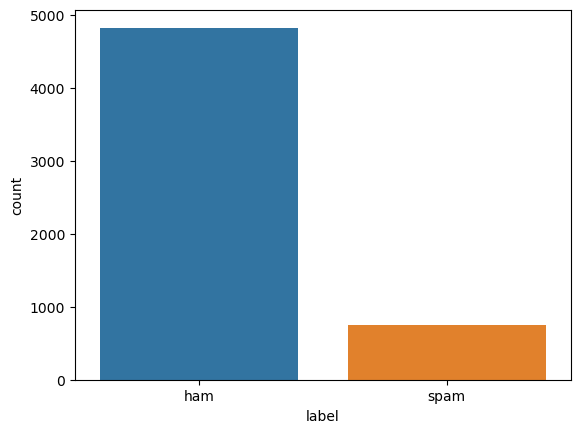

In [15]:
sns.countplot(x=df['label'])

## Creating column that stores the length of the text of each row, and one that stores spam or ham as int

In [16]:
df["len"] = df["text"].apply(len)

In [17]:
df.head()

,label,text,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: >

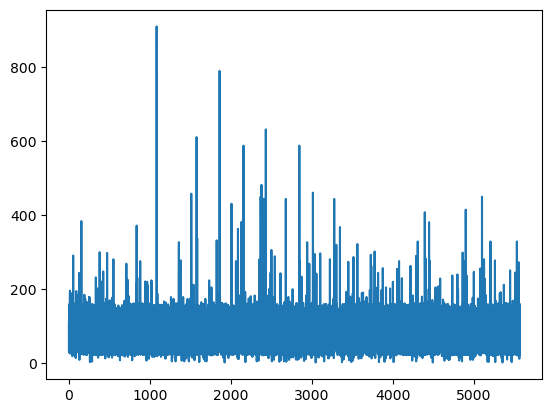

In [18]:
df["len"].plot()

<Axes: ylabel='Frequency'>

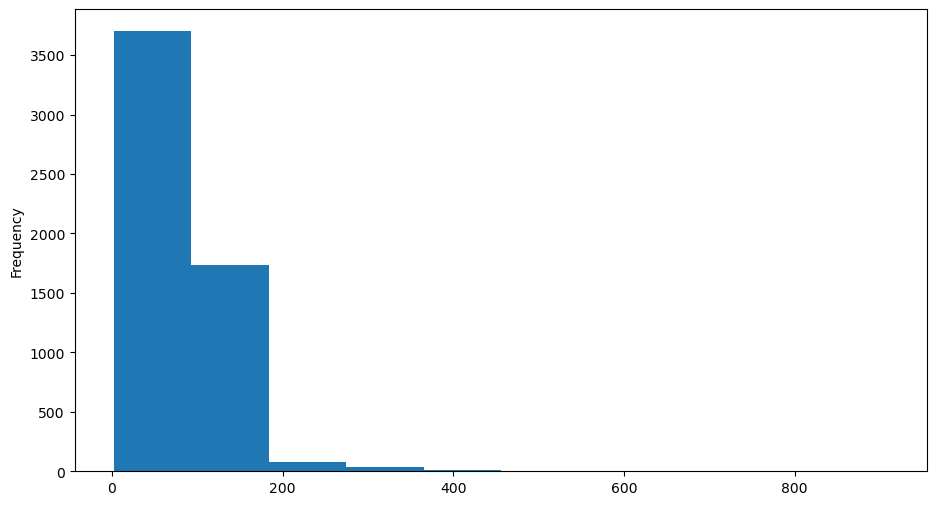

In [19]:
df["len"].plot(kind = 'hist',figsize = (11,6))

In [20]:
np.full((3,4), 13)


array([[13, 13, 13, 13],
       [13, 13, 13, 13],
       [13, 13, 13, 13]])

In [21]:
df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})
df.head()

/tmp/ipykernel_32/214673656.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})


,label,text,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## blah

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
text=count.fit_transform(df['text'], input)

x_train, x_test, y_train, y_test = train_test_split(text, df['label'], test_size = 0.20, random_state = 1)

In [97]:
print(x_train.shape)
print(x_test.shape)

print(text.shape)
input = text[5571]

(4457, 8672)
(1115, 8672)
(5572, 8672)


<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

## ML Model (MultinomialNB)

In [53]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [55]:
prediction = model.predict(x_test) 
print(prediction)

[0 0 0 ... 0 0 0]


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score : ", format(accuracy_score(y_test, prediction)))
print("Precision score : ", format(precision_score(y_test, prediction)))
print("Recall score : ", format(recall_score(y_test, prediction)))
print("f1 score : ", format(f1_score(y_test, prediction)))


Accuracy score :  0.97847533632287
Precision score :  0.891156462585034
Recall score :  0.9424460431654677
f1 score :  0.9160839160839161


## ML Model (BernoulliNB)

In [59]:

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [60]:
prediction = model.predict(x_test) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score : ", format(accuracy_score(y_test, prediction)))
print("Precision score : ", format(precision_score(y_test, prediction)))
print("Recall score : ", format(recall_score(y_test, prediction)))
print("f1 score : ", format(f1_score(y_test, prediction)))


Accuracy score :  0.9865470852017937
Precision score :  0.984375
Recall score :  0.9064748201438849
f1 score :  0.9438202247191011


## ML Model(ComplementNB)

In [64]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train,y_train)
prediction = model.predict(x_test) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score : ", format(accuracy_score(y_test, prediction)))
print("Precision score : ", format(precision_score(y_test, prediction)))
print("Recall score : ", format(recall_score(y_test, prediction)))
print("f1 score : ", format(f1_score(y_test, prediction)))


Accuracy score :  0.9668161434977578
Precision score :  0.8109756097560976
Recall score :  0.9568345323741008
f1 score :  0.877887788778878


## ML Model (Neural Network)

In [70]:
from sklearn.neural_network import MLPClassifier


In [71]:
model = MLPClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score : ", format(accuracy_score(y_test, prediction)))
print("Precision score : ", format(precision_score(y_test, prediction)))
print("Recall score : ", format(recall_score(y_test, prediction)))
print("f1 score : ", format(f1_score(y_test, prediction)))


Accuracy score :  0.9928251121076234
Precision score :  1.0
Recall score :  0.9424460431654677
f1 score :  0.9703703703703704


# Predicting example inputs and checking

In [82]:
model.predict(input)  #input was "hello how are you"

array([0])

### 0 represents a normal message and 1 represents a spam message

In [123]:
d = df["text"]
d

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [126]:
d.loc[len(d.index)] = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18"
d

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Free entry in 2 a wkly comp to win FA Cup fina...
Name: text, Length: 5573, dtype: object

In [128]:
text = count.fit_transform(d)
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73939 stored elements in Compressed Sparse Row format>

In [131]:
input = text[5572]

In [132]:
model.predict(input)

array([1])

### (Spam message!!!)

## Confusion matrix

In [146]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
acc = accuracy_score(y_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [150]:
cm

array([[976,   0],
       [  8, 131]])

<Axes: >

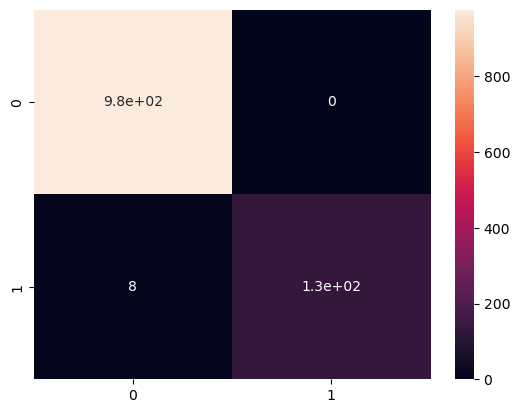

In [148]:
import seaborn as sns
sns.heatmap(cm, annot=True)